In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os


#  Load the dataset 
df= pd.read_excel("E:\python\Myproject\PhonePe_Transaction_Statement2.xlsx", header=None)
# Display the first few rows of the dataframe
print(df.columns)
print(df.shape)

#  Rename the columns
df.columns=["DateTime", "Details","Type","Amount"]

# Filter only main transaction rows (Amount not NaN)
Main_row = df[df["Amount"].notna()].copy()

# Forward-fill Details and Type because they appear in rows below
Main_row["Details"] = Main_row["Details"].ffill()
Main_row["Type"] = Main_row["Type"].ffill()

#  Split Date and Time
Main_row[["Date", "Time"]] = df["DateTime"].str.split("\n", expand=True)

# Extract Person Name (very important!)
Main_row["Person"] = Main_row["Details"].str.extract(r'(?:from|to)\s+([A-Za-z]+)')
# print(Main_row)

# Extract Transaction ID
Main_row["TransactionID"] = Main_row["Details"].str.extract(r'Transaction ID\s*:\s*([A-Z0-9]+)')

# Convert Amount to numeric
Main_row["Amount"] = pd.to_numeric(Main_row["Amount"], errors="coerce")

# Extract Month
Main_row["Month"] = pd.to_datetime(Main_row['Date'],errors="coerce").dt.strftime("%B")

# Final cleaned Data Frame
Final_df = Main_row[["Date", "Time", "Person", "Type", "Amount","Month","TransactionID"]]

Final_df["Person"] =Final_df["Person"].replace("",np.nan)
Final_df["Person"] =Final_df["Person"].fillna("Master")

print(Final_df.head(10))

df= Final_df.copy()

#  Total Number of Transaction 
print("Total Transaction:", len(df))

# Summary Statistics for Amount
df['Amount'].describe()

# Unique persons you transacted with
df["Person"].unique()

# Who you paid and who paid you
df["Type"].value_counts()

output_file =r"E:\python\Myproject\PhonePe_Final_for_PowerBI_PM.xlsx"

Final_df.to_excel(output_file, index=False)

print("\nSaved Cleaned Dataset to :", output_file)

os.startfile(r"E:\python\Myproject\PhonePe_Final_for_PowerBI_PM.xlsx")


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\DELL\AppData\Local\Temp\ipykernel_26380\1053452961.py:10: SyntaxWarning: invalid escape sequence '\p'
  df= pd.read_excel("E:\python\Myproject\PhonePe_Transaction_Statement2.xlsx", header=None)


Index([0, 1, 2, 3], dtype='int64')
(1148, 4)
            Date      Time     Person    Type  Amount     Month  \
1           Date      None     Master    Type     NaN       NaN   
2   Jan 05, 2023  05:21 PM     Master  Credit   660.0   January   
5   Jan 28, 2023  07:48 PM   Sanjeeva  Credit   100.0   January   
8   Feb 08, 2023  07:16 PM     Master   Debit    50.0  February   
11  Feb 14, 2023  04:52 PM   Shivaraj   Debit   780.0  February   
14  Feb 17, 2023  05:51 PM     RAMESH   Debit   120.0  February   
17  Feb 26, 2023  11:12 AM   mahadeva   Debit    10.0  February   
20  Mar 04, 2023  01:49 PM   Shivaraj   Debit  2550.0     March   
23  Mar 05, 2023  03:27 PM   Shivaraj  Credit   450.0     March   
27  Mar 05, 2023  03:42 PM  Prashanth  Credit   190.0     March   

              TransactionID  
1                       NaN  
2   T2301051721145652469815  
5   T2301281948350038693889  
8   T2302081916237551608611  
11  T2302141652513535169038  
14  T2302171751496905965243  
17  T23

C:\Users\DELL\AppData\Local\Temp\ipykernel_26380\1053452961.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Main_row["Month"] = pd.to_datetime(Main_row['Date'],errors="coerce").dt.strftime("%B")
C:\Users\DELL\AppData\Local\Temp\ipykernel_26380\1053452961.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df["Person"] =Final_df["Person"].replace("",np.nan)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26380\1053452961.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume


Saved Cleaned Dataset to : E:\python\Myproject\PhonePe_Final_for_PowerBI_PM.xlsx


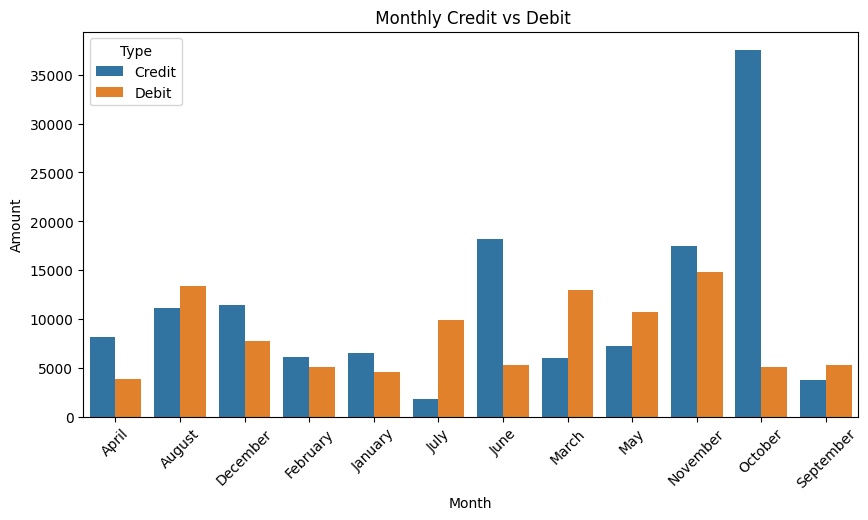

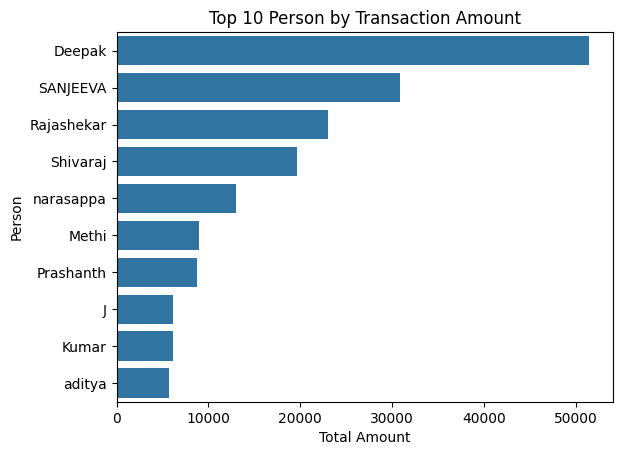

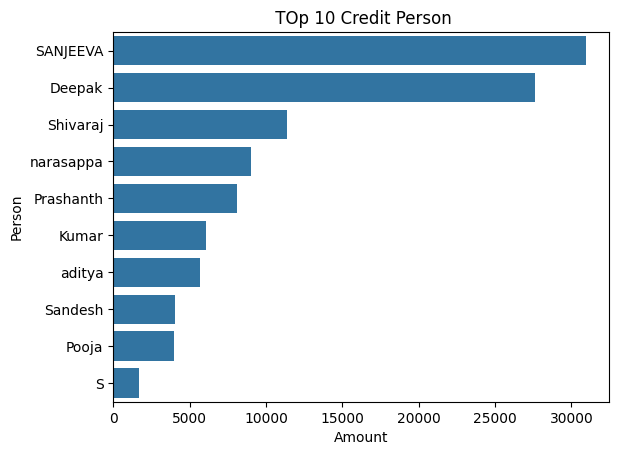

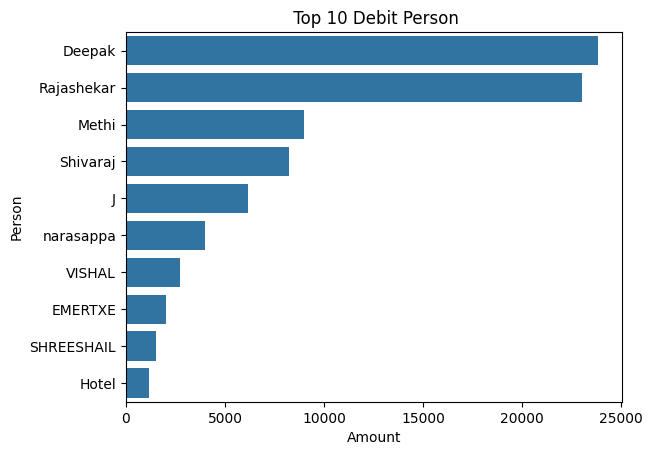

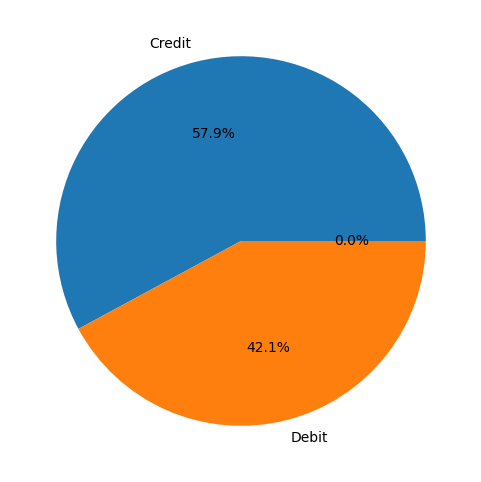

In [43]:
# Total Month Credit and Debit Amount
Monthly = Final_df.groupby(["Month","Type"])["Amount"].sum().reset_index()

# Separate Top Persons for Credit & Debit
# Top 10 Credit Person
Top_credit = Final_df[Final_df["Type"]=="Credit"].groupby("Person")["Amount"].sum().nlargest(10).reset_index()
# print(Top_credit)
# Top 10 Debit Person
Top_debit =Final_df[Final_df["Type"]=="Debit"].groupby("Person")["Amount"].sum().nlargest(10).reset_index()
# print(Top_debit)


plt.figure(figsize=(10,5))
sns.barplot(data=Monthly, x="Month", y="Amount", hue="Type")
plt.title(" Monthly Credit vs Debit")
plt.xticks(rotation=45)
plt.show()

Top_Person = Final_df.groupby("Person")["Amount"].sum().sort_values(ascending=False).head(10)

plt.Figure(figsize=(10,5))
sns.barplot(x=Top_Person.values,y=Top_Person.index)
plt.title("Top 10 Person by Transaction Amount")
plt.xlabel("Total Amount")
plt.ylabel("Person")
plt.show()

# Top 10 Credit Person
plt.Figure(figsize=(10,5))
sns.barplot(data=Top_credit, x="Amount",y="Person")
plt.title(" TOp 10 Credit Person")
plt.xlabel("Amount")
plt.ylabel("Person")
plt.show()

# Top 10 Debit Person
plt.Figure(figsize=(10,5))
sns.barplot(data=Top_debit, x="Amount", y="Person")
plt.title(" Top 10 Debit Person")
plt.xlabel("Amount")
plt.ylabel("Person")
plt.show()

# Credit vs Debit Pie Chart
plt.figure(figsize=(6,6))
Final_df.groupby("Type")["Amount"].sum().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.show()
